## Plotting with Matplotlib 

 **matplotlib** is a set of python libraries with an extensive set of plotting capabilities. The older API for matplotlib is procedural, but the newer APIs, and the recommended ones, are Object-Oriented.  

#### I will use the OOP-style APIs in this notebook. If you look at online resources, you will see both OOP style and non-OOP style APIs being used. The non-OOP style makes plotting with matplotlib somewhat similar to MATLAB that many people used for plotting in data-intensive applications. The OOP-style is more modern and powerful and I want you to be familiar eith it. So, in this course, please stick to that API. By using it, not only can you create nice plots, but also become more familiar with OOP style of thinking.

In [1]:
import matplotlib.pyplot as plt ## Plotting library
import numpy as np ## numerics
import pandas as pd ## for data frame handling

All subsequent API calls will use this imported module.

Each matplotlib plot is contained in a hierarchy of objects. The outermost container of this hierarchy is called a **Figure** object. Inside the Figure, you can have one or multiple Axes objects, which contain the plots we draw. The subplots are created by defining a set of Axes. All plotting therefore happens in a subplot created with Axes objects. 

https://realpython.com/python-matplotlib-guide/#the-matplotlib-object-hierarchy

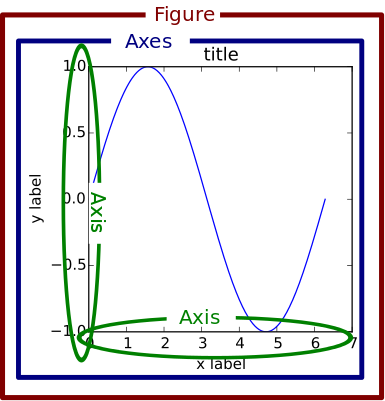

Below we will create a single plot (a figure) with one subplot, which will be a set of axes, and draw a plot in that subplot.

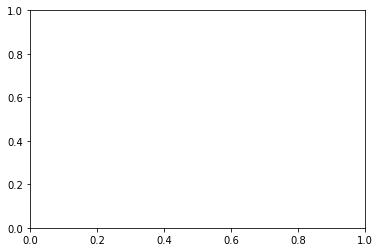

In [2]:
fig, ax = plt.subplots()  ## no plots are drawn yet, just create the figure and Axes containiers. 

The above call to subplots() function returns a **figure object** which we called fig, and an **Axes object** which we called ax. The Axes object itself contains the x-axis and y-axis of the plot, along with other elements such as axis-ticks, axis labels, legends as well as the plot of data that ultimately interest us.

Think of the fig as the overall figure, within which you have an Axes object, which contains the x-axis and y-axis as displayed above. You can set and get various properties of the Figure and Axes by using the **getter** and **setter** methods on these objects.

You can inspect the types of the Figure and Axes objects:


In [3]:
type(ax)

matplotlib.axes._subplots.AxesSubplot

In [4]:
type(fig)

matplotlib.figure.Figure

#### Below you can see some method calls on the Axes and Figure objects. Every aspect of the plot can be customized, these are just sample API calls. As we do more data plotting, we will see more customization options. 

In [5]:
print(ax.get_xlim()) ## print out the default x-axis range

(0.0, 1.0)


In [6]:
 print(ax.get_ylim()) ## print out the default y-axis range

(0.0, 1.0)


In [7]:
ax.set_xlabel("x axis")   ### We are giving the x-axis a label

Text(0.5, 3.1999999999999993, 'x axis')

In [8]:
fig.suptitle("super title")  ## Title to the whole fig. If you have multiple subplots, this will be a common title to all of them

Text(0.5, 0.98, 'super title')

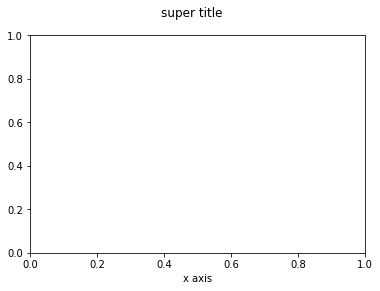

In [9]:
fig   ## Just call fig with no argument to display on screen:

Notice the default x and y axis limits (0, 1) as well as the ticks on both axes placed at default locations. We can customize the ticks 

In [10]:
ax.set_xticks(np.linspace(0,1,5))  ## Five equi-spaced coordinates from 0 to 1 inclusive. This is where ticks will be placed
ax.set_xticklabels(["A","B", "C", "D", "E"] )  ### Tick labels. 

[Text(0.0, 0, 'A'),
 Text(0.25, 0, 'B'),
 Text(0.5, 0, 'C'),
 Text(0.75, 0, 'D'),
 Text(1.0, 0, 'E')]

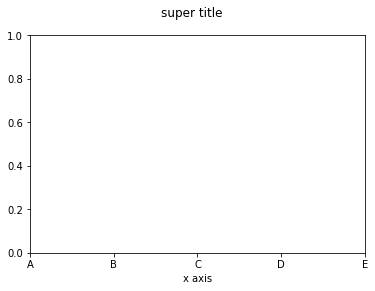

In [11]:
fig

### Another skeleton plot

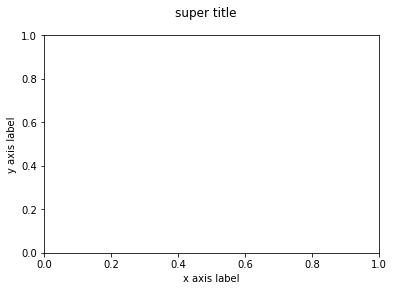

In [12]:
fig, ax = plt.subplots()
fig.suptitle("super title")
ax.set_xlabel("x axis label")
ax.set_ylabel("y axis label")
plt.show()

In general, you can have multiple subplots within a figure. Each of these subplots are made by a corresponding Axes object which can be called upon to contain their own plots.

Multiple subplots within the same figure is created by giving a pair of arguments to fig.subplots() call. 


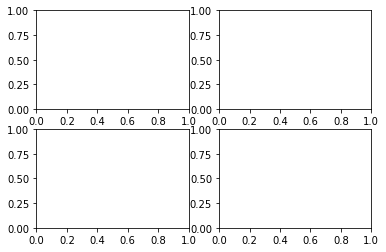

In [13]:
fig, ax = plt.subplots(2,2) ## Create a figure with 4 Axes objects, 2 rows and 2 columns:

You can see that the four subplots are crowding the space. We can expand the figure container to remedy this. The following code sets the figure height and width, and plots four functions  y = x, y = x^2, y = log10(x) and y = x\*log(10x). Notice that to plot the actual graphs, you need to give x and y coordinates and specify the plot type. 

There are many ways you can give the x and y coordinates for an actual plot. For example, you can manually supply them like:<br>
x=np.array([1, 1.5, 2, 2.5, 3, 3.5, 4])  <br>
y=np.array([1, 1.3, 2.1, 2.8, 3.2, 4.2, 4]) <br>

You can have a pandas DataFrame, and use its columns as lists for plotting. Below we will load wine data and do some plots.

Or, you can, for example, give x values like: **x=np.linspace(1,10,100)**  and then define y as a function of x using numpy built-in functions, for instance: <br>
y= np.square(x) or<br>
y=np.sin(x)  

Please look up the functions *linspace*, *square* and *sin* in numpy API.


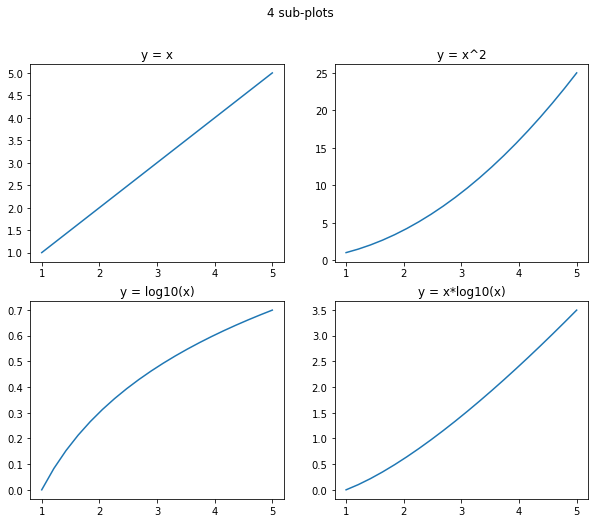

In [14]:
fig, ax = plt.subplots(2,2)
fig.suptitle("4 sub-plots")
x=np.linspace(1,5,20) ## 20 points between 1 and 5 for the x-axis
ax[0,0].plot(x, x) ## linear function
ax[0,0].set_title('y = x') #
ax[0,1].plot(x, np.square(x))  ## quadratic function
ax[0,1].set_title('y = x^2')
ax[1,0].plot(x, np.log10(x)) ## log function
ax[1,0].set_title('y = log10(x)')
ax[1,1].plot(x, x*np.log10(x))
ax[1,1].set_title('y = x*log10(x)') ## x log(x) function
fig.set_figheight(8)  ## height of the whole figure 
fig.set_figwidth(10)  ## width of the whole figure 
plt.show()

Well, what do you think? The graphs are correct, but they do not bring out (at least visually) the fact that x^2 function grows a lot faster than x, and that log(x) grows lass slowly than x. This is because each Axes object uses its own y-axis scale. If you can make them use the same y-axis scale, the difference in growth rate  is more visually apparent. This is done by including ***sharex*** and ***sharey*** arguments in the call to create the Axes:

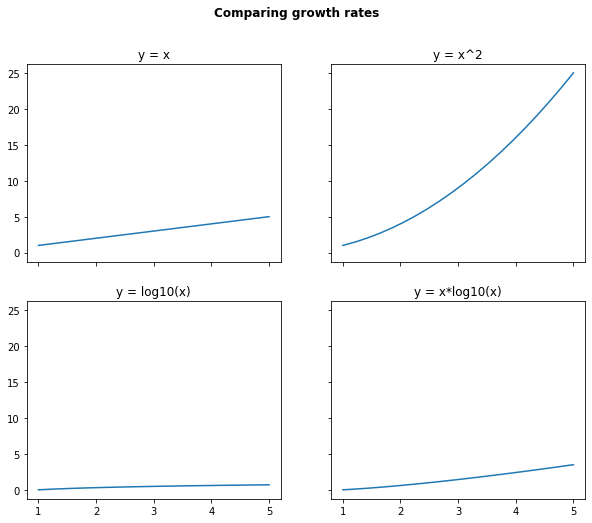

In [15]:
fig, ax = plt.subplots(2,2, sharex='all', sharey='all')
fig.suptitle("Comparing growth rates", fontweight="bold")
x=np.linspace(1,5,20)  ### x coordinates- 20 equi-spaced values from 1 to 5
ax[0,0].plot(x, x)
ax[0,0].set_title('y = x')
ax[0,1].plot(x, np.square(x))
ax[0,1].set_title('y = x^2')
ax[1,0].plot(x, np.log10(x))
ax[1,0].set_title('y = log10(x)')
ax[1,1].plot(x, x*np.log10(x))
ax[1,1].set_title('y = x*log10(x)')
fig.set_figheight(8)
fig.set_figwidth(10)
plt.show()

The above graphs make it visually more apparent the relative growth rates of the functions. 

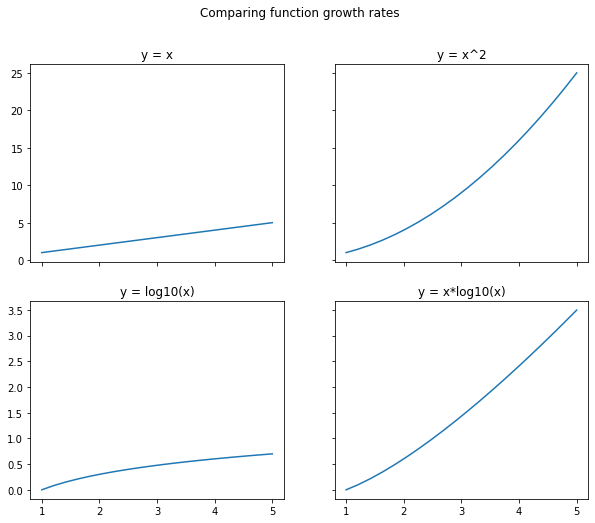

In [16]:
### The following subplots share x-axis scales along columns and y-axis scales along rows
fig, ax = plt.subplots(2,2, sharex='col', sharey='row')
fig.suptitle("Comparing function growth rates")
x=np.linspace(1,5,20) ### x coordinates- 20 equi-spaced values from 1 to 5
ax[0,0].plot(x, x)
ax[0,0].set_title('y = x')
ax[0,1].plot(x, np.square(x))
ax[0,1].set_title('y = x^2')
ax[1,0].plot(x, np.log10(x))
ax[1,0].set_title('y = log10(x)')
ax[1,1].plot(x, x*np.log10(x))
ax[1,1].set_title('y = x*log10(x)')
fig.set_figheight(8)
fig.set_figwidth(10)
plt.show()

#### Another way to show the growth rates of functions is to plot all functions in the same graph and color them differently.

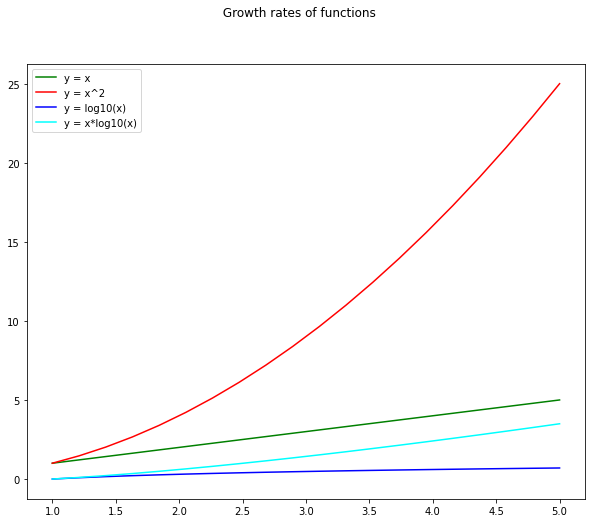

In [17]:
fig, ax = plt.subplots()
fig.suptitle(" Growth rates of functions")
x=np.linspace(1,5,20) ### x coordinates- 20 equi-spaced values from 1 to 5
ax.plot(x, x,color = 'green', label = 'y = x') ## The label will be used if you need to put a legend in the plot
ax.plot(x, np.square(x),color = 'red', label = 'y = x^2')
ax.plot(x, np.log10(x),color = 'blue', label = 'y = log10(x)')
ax.plot(x, x*np.log10(x),color = 'cyan', label = 'y = x*log10(x)')
ax.legend(loc = 'upper left')  ### where should the legend be placed? See what happens if you don't give the location 
fig.set_figheight(8)
fig.set_figwidth(10)
plt.show()

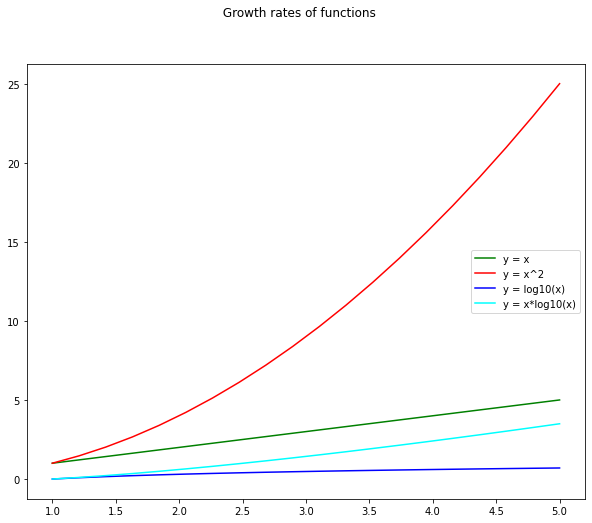

In [18]:
fig, ax = plt.subplots()
fig.suptitle(" Growth rates of functions")
x=np.linspace(1,5,20) ### x coordinates- 20 equi-spaced values from 1 to 5
ax.plot(x, x,color = 'green', label = 'y = x') ## The label will be used if you need to put a legend in the plot
ax.plot(x, np.square(x),color = 'red', label = 'y = x^2')
ax.plot(x, np.log10(x),color = 'blue', label = 'y = log10(x)')
ax.plot(x, x*np.log10(x),color = 'cyan', label = 'y = x*log10(x)')
ax.legend(loc = 'center right')  
fig.set_figheight(8)
fig.set_figwidth(10)
plt.show()

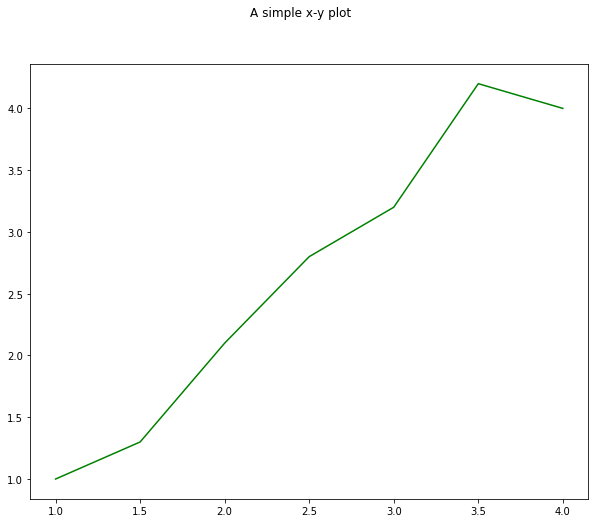

In [19]:
fig, ax = plt.subplots()
fig.suptitle("A simple x-y plot")
x=np.array([1, 1.5, 2, 2.5, 3, 3.5, 4]) ###  x coordinates
y=np.array([1, 1.3, 2.1, 2.8, 3.2, 4.2, 4]) ###  y coordinates
ax.plot(x, y,color = 'green')  
fig.set_figheight(8)
fig.set_figwidth(10)
plt.show()

Notice that you used ax.plot() function in an Axes object to plot a smooth curve through the x, y coordinates.
Other functions exist for Axes objects to draw different types of graphs - see the Axes API : https://matplotlib.org/stable/api/axes_api.html

ax.scatter() - for scatter plots <br>
ax.hist() - for histogram plots <br>
ax.bar() - for bar plots <br>
ax.pie() - for pie charts <br>




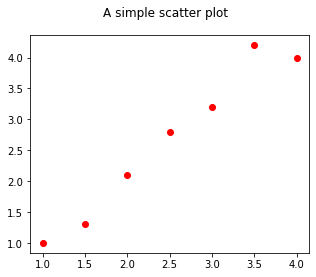

In [20]:
fig, ax = plt.subplots()
fig.suptitle("A simple scatter plot")
x=np.array([1, 1.5, 2, 2.5, 3, 3.5, 4]) ###  x coordinates
y=np.array([1, 1.3, 2.1, 2.8, 3.2, 4.2, 4]) ###  y coordinates
ax.scatter(x, y,color = 'red')  ### A scatter plot
fig.set_figheight(4)
fig.set_figwidth(5)
plt.show()

In [21]:
wi=pd.read_csv("wine.csv")

In [22]:
wi.head()

,fixed_acidity,citric_acid,residual_sugar,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.00,1.9,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.00,2.6,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.04,2.3,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.56,1.9,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.00,1.9,34.0,0.9978,3.51,0.56,9.4,5


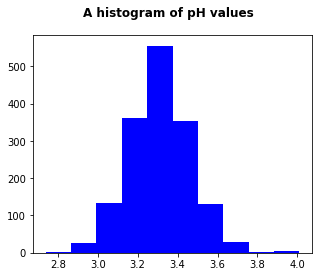

In [25]:
fig, ax = plt.subplots()
fig.suptitle("A histogram of pH values",fontweight="bold")
####ax.hist(wi.iloc[:,6],color = 'red', label = "sulphates")   
ax.hist(wi.iloc[:,5],color = 'blue')
fig.set_figheight(4)
fig.set_figwidth(5)
plt.show()